In [2]:
# Importing required packages 
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras
from sklearn.model_selection import train_test_split
import scikitplot as skplt
from sklearn.metrics import f1_score, classification_report

In [3]:
# Setting the required directory where the Data file is present
os.chdir(r'D:\DI')
print(os.listdir())

['musk_csv.csv', 'weights-improvement-01-0.96.hdf5', 'weights-improvement-02-0.98.hdf5', 'weights-improvement-07-1.00.hdf5']


In [4]:
df=pd.read_csv("musk_csv.csv")   # Reading the Data File

In [5]:
df.head()     # Lets have a look at the first 5 rows 

,ID,molecule_name,conformation_name,f1,f2,f3,f4,f5,f6,f7,...,f158,f159,f160,f161,f162,f163,f164,f165,f166,class
0,1,MUSK-211,211_1+1,46,-108,-60,-69,-117,49,38,...,-308,52,-7,39,126,156,-50,-112,96,1
1,2,MUSK-211,211_1+10,41,-188,-145,22,-117,-6,57,...,-59,-2,52,103,136,169,-61,-136,79,1
2,3,MUSK-211,211_1+11,46,-194,-145,28,-117,73,57,...,-134,-154,57,143,142,165,-67,-145,39,1
3,4,MUSK-211,211_1+12,41,-188,-145,22,-117,-7,57,...,-60,-4,52,104,136,168,-60,-135,80,1
4,5,MUSK-211,211_1+13,41,-188,-145,22,-117,-7,57,...,-60,-4,52,104,137,168,-60,-135,80,1


In [6]:
df.info()     # Lets see how many columns do we have and what's their data type is?
              # 6598 Data entries with 170 columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6598 entries, 0 to 6597
Columns: 170 entries, ID to class
dtypes: int64(168), object(2)
memory usage: 8.6+ MB


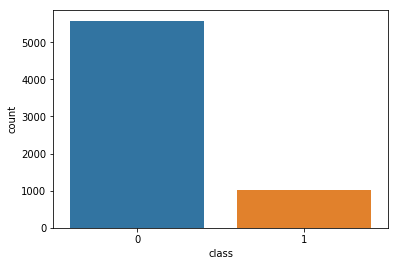

In [6]:
# Lets see, in which proportion the Class label is present
# This is an unbalanced class problem 
sns.countplot(df['class'])

In [7]:
print("Class 1 is only "+str(round((df['class'].sum())/len(df)*100))+str(" %"))

Class 1 is only 15.0 %


In [8]:
# Lets have a look at the no of Unique molecule name and Conformation name
print("Unique Molecule name: "+str(len(df['molecule_name'].value_counts())))
print("Unique Conformation name: "+str(len(df['conformation_name'].value_counts())))  
# Since there are 6598 unique conformations it means there is an information about 6598 molecules where name can same but every 
# data point is related to an unique Molecule

Unique Molecule name: 102
Unique Conformation name: 6598


In [7]:
# Lets drop ID, Molecule_name and Conformation Name as they are not the features just an Identity.
df.drop(['molecule_name','conformation_name','ID'],axis=1,inplace=True)


In [8]:
# Lets build a feature matrix data frame and call that X and label Data Frame and lets call that y
X=df.drop(['class'],axis=1)
y=df[['class']]
df.head()


,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,...,f158,f159,f160,f161,f162,f163,f164,f165,f166,class
0,46,-108,-60,-69,-117,49,38,-161,-8,5,...,-308,52,-7,39,126,156,-50,-112,96,1
1,41,-188,-145,22,-117,-6,57,-171,-39,-100,...,-59,-2,52,103,136,169,-61,-136,79,1
2,46,-194,-145,28,-117,73,57,-168,-39,-22,...,-134,-154,57,143,142,165,-67,-145,39,1
3,41,-188,-145,22,-117,-7,57,-170,-39,-99,...,-60,-4,52,104,136,168,-60,-135,80,1
4,41,-188,-145,22,-117,-7,57,-170,-39,-99,...,-60,-4,52,104,137,168,-60,-135,80,1


In [9]:
#Lets split the data into train and test in 80:20 ratio 
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,stratify=y)

In [10]:
# Lets have a look at the shape of the train and validation data set
print("X_Train shape: "+str(X_train.shape))
print("y_Train shape: "+str(y_train.shape))
print("X_test shape: "+str(X_test.shape))
print("y_test shape: "+str(y_test.shape))

X_Train shape: (5278, 166)
y_Train shape: (5278, 1)
X_test shape: (1320, 166)
y_test shape: (1320, 1)


In [11]:
# Lets make a hot encoded labels because of our DNN Architecture
y_train=np.array(y_train)
y_test=np.array(y_test)
from keras.utils import to_categorical
y_train_=to_categorical(y_train)
y_test_=to_categorical(y_test)
print("y_train_ shape: "+str(y_train_.shape))
print("y_test_ shape: "+str(y_test_.shape))

y_train_ shape: (5278, 2)
y_test_ shape: (1320, 2)


In [14]:
# Lets built a callback so that we can save the best model instatntly on the basis of validation Accuracy
from keras.callbacks import ModelCheckpoint
current_directory=os.getcwd()
filepath=current_directory
checkpoint = ModelCheckpoint("weights-improvement-{epoch:02d}-{val_accuracy:.2f}.hdf5", monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

In [15]:
# Lets build a DNN for this classification problem
# 166 Neurons in INput Layer with Activation Relu
# then 264,128,64 neurons in respected hidden layers
# 2 neurons in Output layer with Softmax as an Activation Function(to convert the outputs into probabilities)



model= keras.Sequential([   keras.layers.Dense(166, input_shape=(166,), activation='relu'), 
                            keras.layers.Dense(264,activation='relu'),
                           keras.layers.Dense(128,activation='relu'),
                         keras.layers.Dropout(0.1),                     # Dropping rate for Regularization
                           keras.layers.Dense(64,activation='relu'),
                         keras.layers.Dropout(0.1),                     # Dropping rate for Regularization
                         keras.layers.Dense(2,activation='softmax')
    
    
    
])

In [16]:
# Lets see our model Summary and No. of parameters that we need to train
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 166)               27722     
_________________________________________________________________
dense_2 (Dense)              (None, 264)               44088     
_________________________________________________________________
dense_3 (Dense)              (None, 128)               33920     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 2)                

In [17]:
#Lets compile our model with a loss function 'Categorical_crossentropy'
# Lets use Adam as an optimizer with Default learning rate i.e 0.001
# And see the performance on the basis of Accuracy metrics
model.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])


In [18]:
# Lets train our model with a validation split of 1% and Batch_size of 10 and upto 100 epochs
# And Store the Accuracy and Loss in a History Object
history=model.fit(X_train,y_train_,validation_split=0.01, epochs=100,batch_size=10,callbacks=callbacks_list)

Train on 5225 samples, validate on 53 samples
Epoch 1/100
5225/5225 [==============================] - 6s 1ms/step - loss: 1.3960 - accuracy: 0.8699 - val_loss: 0.1502 - val_accuracy: 0.9623

Epoch 00001: val_accuracy improved from -inf to 0.96226, saving model to weights-improvement-01-0.96.hdf5
Epoch 2/100
5225/5225 [==============================] - 4s 839us/step - loss: 0.2035 - accuracy: 0.9319 - val_loss: 0.0916 - val_accuracy: 0.9811

Epoch 00002: val_accuracy improved from 0.96226 to 0.98113, saving model to weights-improvement-02-0.98.hdf5
Epoch 3/100
5225/5225 [==============================] - 4s 827us/step - loss: 0.1594 - accuracy: 0.9424 - val_loss: 0.0731 - val_accuracy: 0.9434

Epoch 00003: val_accuracy did not improve from 0.98113
Epoch 4/100
5225/5225 [==============================] - 4s 828us/step - loss: 0.1237 - accuracy: 0.9541 - val_loss: 0.0809 - val_accuracy: 0.9811

Epoch 00004: val_accuracy did not improve from 0.98113
Epoch 5/100
5225/5225 [================

Text(0,0.5,'Loss')

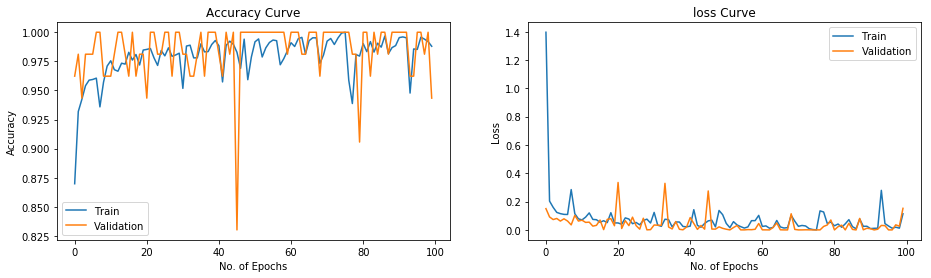

In [19]:
# Lets make a plot of Accuracy and Loss as a function of Epochs for Both Validation and Train

plt.subplots_adjust(left=12,right=14)
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['Train','Validation'])
plt.title("Accuracy Curve")
plt.xlabel("No. of Epochs")
plt.ylabel("Accuracy")
plt.subplot(1,2,2)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Train','Validation'])
plt.title("loss Curve")
plt.xlabel("No. of Epochs")
plt.ylabel("Loss")

# As we can see that the model is not overfitting since the Accuracy curve for both the Train and Validation Data Set
# is Closer to each other and regularly Increasing
# As well As the loss is also decreasing for both the Data Sets with the Epochs

In [12]:
# Lets use the best model which has 100% Val Accuracy and 96.06 % on Train
from keras.models import load_model
model=load_model("weights-improvement-07-1.00.hdf5")

In [13]:
# Lets predict the probabilities for train and Test data 
y_pred_train_=model.predict(X_train)
y_pred_test_=model.predict(X_test)


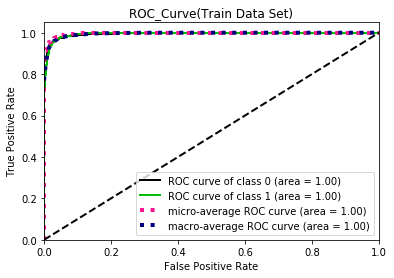

In [14]:
#  lets plot a ROC curve for train Data Set and see how our model has performed with the help of Area Under Curve(AUC) 
#parameter

skplt.metrics.plot_roc(y_train,y_pred_train_,title="ROC_Curve(Train Data Set)")

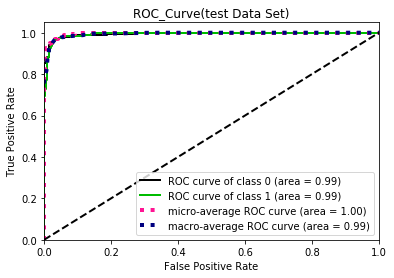

In [30]:
#  lets plot a ROC curve for test Data Set and see how our model has performed with the help of Area Under Curve(AUC) 
#parameter
skplt.metrics.plot_roc(y_test,y_pred_test_,title="ROC_Curve(test Data Set)")

C:\Users\user\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


Text(0,0.5,'F1_score')

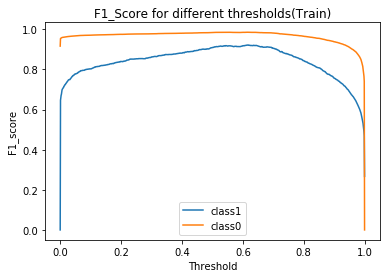

In [31]:
# Lets plot a f1 score for both the classes with respect to different thresholds AND See on which threshold our model
#is performing best
# train
from sklearn.metrics import f1_score
f1_0=[]   # Empty list for f1_score for Class 0 at different thresholds
f1_1=[]   # Empty list for f1_score for Class 1 at different thresholds
threshold=np.linspace(1,0,1000)   # lets define a threshold numpy array between 0 and 1 with gap 100K 
# Lets store the f1 score for classes 0 and 1 with respect to every threshold 
for t in threshold:
    y_pred=[]
    for i in y_pred_train_[:,0]:
    
        if(i>t):
            y_pred.append(0)
        else:
            y_pred.append(1)
    f1_0.append(f1_score(y_train,y_pred,pos_label=0))
    f1_1.append(f1_score(y_train,y_pred,pos_label=1))
plt.plot(np.linspace(1,0,1000),f1_1)
plt.plot(np.linspace(1,0,1000),f1_0)
plt.legend(['class1','class0'])
plt.title("F1_Score for different thresholds(Train)") 
plt.xlabel("Threshold")
plt.ylabel("F1_score")

f1_score_1: 0.9100529100529101
f1_score_0: 0.982721626199887


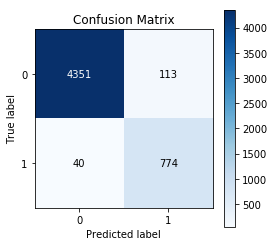

In [23]:
# With the help of the above plot lets see which threshold is best and use that for the final prediction and store the 
#labels in y_pred list
y_pred=[]
for i in y_pred_train_[:,0]:
    if(i>0.68):                   # So the best threshold can be 0.68
        y_pred.append(0)
    else:
        y_pred.append(1)
import scikitplot as skplt
from sklearn.metrics import f1_score, classification_report
cr_train=classification_report(y_train,y_pred)
skplt.metrics.plot_confusion_matrix(y_train,y_pred,figsize=(4,4))
print("f1_score_1: "+str(f1_score(y_train,y_pred,pos_label=1)))
print("f1_score_0: "+str(f1_score(y_train,y_pred,pos_label=0)))        

In [24]:
# Classification report on training Data
print(cr_train)

              precision    recall  f1-score   support

           0       0.99      0.97      0.98      4464
           1       0.87      0.95      0.91       814

    accuracy                           0.97      5278
   macro avg       0.93      0.96      0.95      5278
weighted avg       0.97      0.97      0.97      5278



f1_score_1: 0.9090909090909092
f1_score_0: 0.9823609226594301


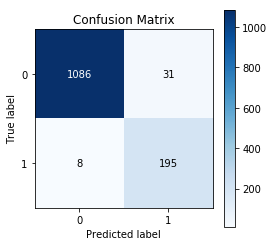

In [25]:
# F1_score and Confusion matrix on Test Data
y_pred=[]
for i in y_pred_test_[:,0]:
    if(i>0.68):
        y_pred.append(0)
    else:
        y_pred.append(1)
import scikitplot as skplt
from sklearn.metrics import f1_score
skplt.metrics.plot_confusion_matrix(y_test,y_pred,figsize=(4,4))
print("f1_score_1: "+str(f1_score(y_test,y_pred,pos_label=1)))
print("f1_score_0: "+str(f1_score(y_test,y_pred,pos_label=0)))        
cr_test=classification_report(y_test,y_pred)

In [27]:
# Classification report on test
print(cr_test)

              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1117
           1       0.86      0.96      0.91       203

    accuracy                           0.97      1320
   macro avg       0.93      0.97      0.95      1320
weighted avg       0.97      0.97      0.97      1320

